In [2]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import requests
# Load the data into a pandas dataframe
df = pd.read_csv("survey_results_public.csv")

In [3]:
# Confirm the dataframe has the correct number of rows and columns
df.head

<bound method NDFrame.head of        ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2             I am a student who is learning to code   
2               3  I am not primarily a developer, but I write co...   
3               4                     I am a developer by profession   
4               5                     I am a developer by profession   
...           ...                                                ...   
83434       83435                     I am a developer by profession   
83435       83436                     I am a developer by profession   
83436       83437                     I am a developer by profession   
83437       83438                     I am a developer by profession   
83438       83439                     I am a developer by profession   

                                              Employment  \
0      Independent contractor, freelancer, or

In [4]:
#  Select the columns we want to use
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary'}, axis=1)
df.head

<bound method NDFrame.head of                                                  Country  \
0                                               Slovakia   
1                                            Netherlands   
2                                     Russian Federation   
3                                                Austria   
4      United Kingdom of Great Britain and Northern I...   
...                                                  ...   
83434                           United States of America   
83435                                              Benin   
83436                           United States of America   
83437                                             Canada   
83438                                             Brazil   

                                                 EdLevel YearsCodePro  \
0      Secondary school (e.g. American high school, G...          NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)          NaN   
2           Bachelor’s degree 

In [5]:
df['Country'] = df['Country'].replace('United States of America', 'USA')
df['Country'] = df['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
df['Country'] = df['Country'].replace('Russian Federation', 'Russia')

In [6]:
# Drop all Null Salary values
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [7]:
# Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [8]:
# Drop rows where any value is NAN
df = df.dropna()
# Count all null values
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
# Drop all part-timers
df = df[df['Employment'] == 'Employed full-time']
df = df.drop('Employment', axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [10]:
# Count data points from each country
df['Country'].value_counts()

USA                       9175
India                     3385
Germany                   2753
UK                        2604
Canada                    1553
                          ... 
Saint Kitts and Nevis        1
Monaco                       1
Libyan Arab Jamahiriya       1
Somalia                      1
Burundi                      1
Name: Country, Length: 166, dtype: int64

In [11]:
# Function to remove low count data points
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] =  categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [12]:
country_map = shorten_categories(df.Country.value_counts(), 600)
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()

Other          12448
USA             9175
India           3385
Germany         2753
UK              2604
Canada          1553
France          1396
Brazil          1340
Spain            890
Netherlands      835
Australia        825
Poland           775
Italy            756
Russia           741
Sweden           735
Name: Country, dtype: int64

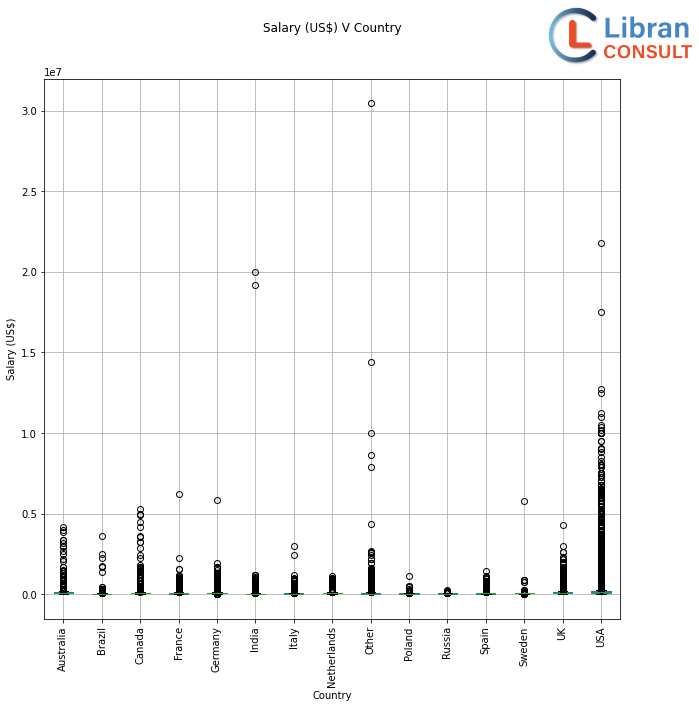

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
im = plt.imread('logo.png')
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) V Country')
plt.title('')
plt.ylabel('Salary (US$)')
plt.xlabel('Country')
plt.xticks(rotation=90)
newax = fig.add_axes([0.8,0.8,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')
plt.show()

In [14]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

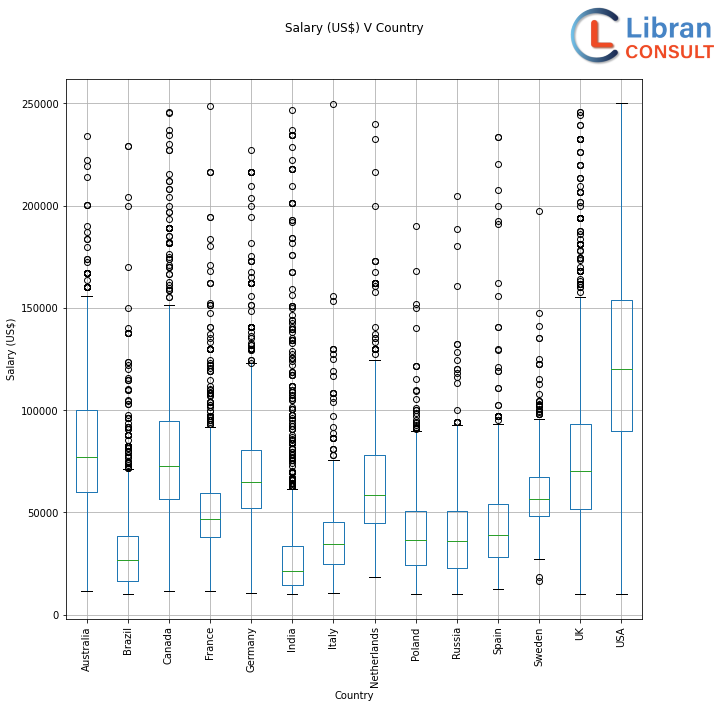

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
im = plt.imread('logo.png')
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) V Country')
plt.title('')
plt.ylabel('Salary (US$)')
plt.xlabel('Country')
plt.xticks(rotation=90)
newax = fig.add_axes([0.8,0.8,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')
plt.show()

In [16]:
df["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '34', '11', '25', '24',
       '22', '13', '9', '26', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [17]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [18]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [19]:

def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [20]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([2, 0, 3, 1])

In [22]:

le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([11, 10,  4,  2,  3, 12,  9, 13,  1,  6,  7,  8,  0,  5])

In [23]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [24]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [25]:
y_pred = linear_reg.predict(X)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$41,806.04


In [27]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [28]:
y_pred = dec_tree_reg.predict(X)

In [29]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$31,720.17


In [30]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [31]:
y_pred = random_forest_reg.predict(X)

In [32]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$31,768.30


In [33]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [34]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$32,654.52


In [35]:
X

,Country,EdLevel,YearsCodePro
9,11,2,4.0
11,10,0,5.0
12,4,2,6.0
17,2,0,6.0
23,3,2,2.0
...,...,...,...
83430,13,2,21.0
83432,2,0,0.5
83434,13,0,5.0
83436,13,1,4.0


In [36]:
# country, edlevel, yearscode
X = np.array([["USA", 'Master’s degree', 15 ]])
X

array([['USA', 'Master’s degree', '15']], dtype='<U21')

In [37]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [38]:
y_pred = regressor.predict(X)
y_pred

/home/brightkoech/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([148665.38181818])

In [39]:
import pickle

In [40]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [41]:
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [42]:
y_pred = regressor_loaded.predict(X)
y_pred

/home/brightkoech/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([148665.38181818])